# ingesting data

In [1]:

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# looking at data structure


In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


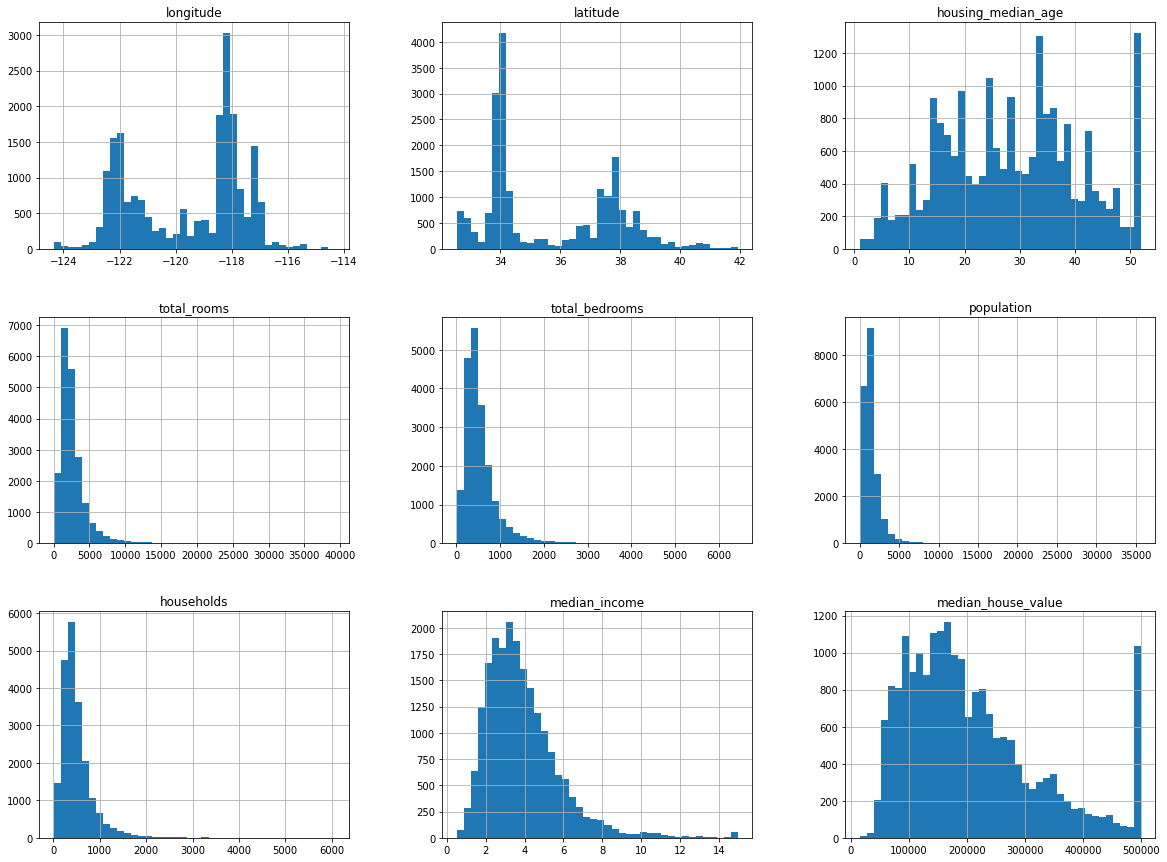

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=40,figsize=(20,15))
plt.show()
# plotting histograms for the numerical attributes

# creating a test set

In [9]:
import numpy as np
np.random.seed(42)

In [10]:
#try train_test_split() after
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set))

print(len(test_set))

16512
4128


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
test_set.head() #in practice i do not want to see test_set but this is just an example

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [14]:
test_set.shape

(4128, 10)

In [15]:
train_set.shape

(16512, 10)

<AxesSubplot:>

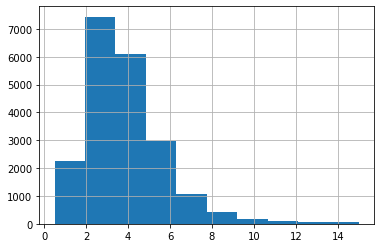

In [16]:

housing["median_income"].hist()

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

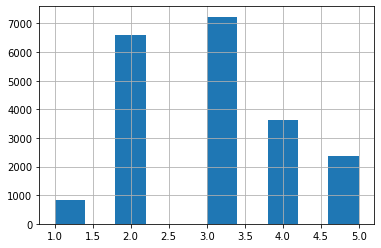

In [18]:
housing["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set['income_cat'].value_counts(normalize=True)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
for col in (strat_train_set,strat_test_set):
    col.drop('income_cat',axis=1, inplace=True)

# Visualizing Data

In [22]:
housing1 = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

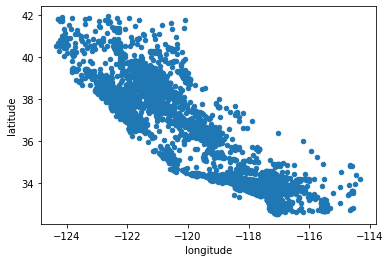

In [23]:
housing1.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

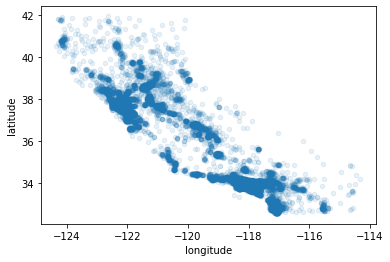

In [24]:
housing1.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1) #changing alpha to be able to detect high density of points

<Figure size 432x288 with 0 Axes>

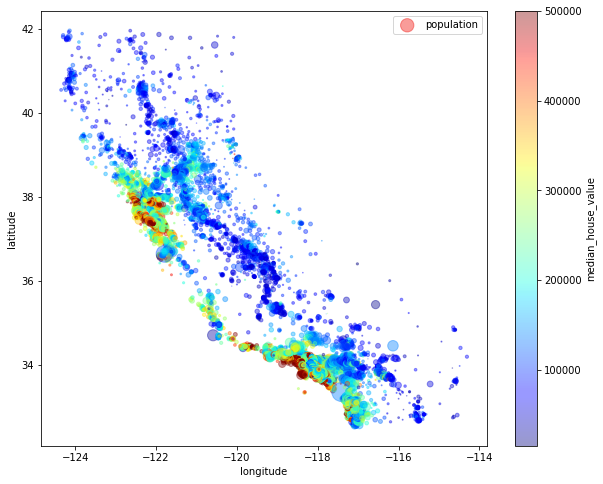

<Figure size 432x288 with 0 Axes>

In [25]:
housing.plot(kind='scatter',x='longitude', y='latitude',alpha=0.4,\
    s=housing['population']/100, label='population',figsize=(10,8)\
    ,c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True,\
    sharex=False)
plt.figure()

In [26]:
corr_matrix = housing1.corr()
# import seaborn as sns
# sns.heatmap(corr_matrix,xticklabels = housing1.columns,yticklabels =housing1.columns, cmap='jet')
# plt.tight_layout()
# plt.show()

In [27]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

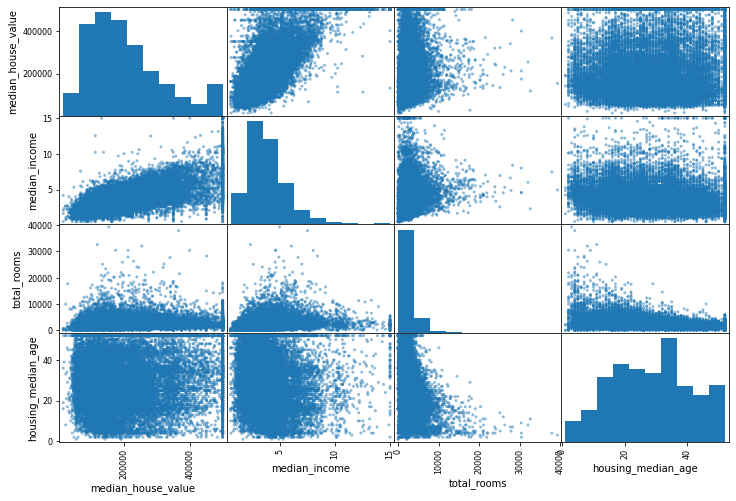

In [28]:
#check pandas documentation for other values
from pandas.plotting import scatter_matrix
imp_attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[imp_attributes],figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

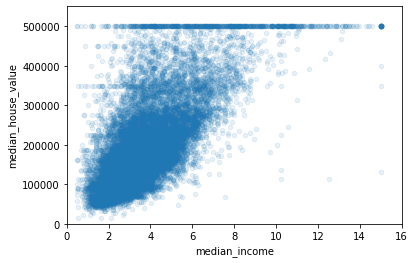

In [29]:
housing1.plot(kind='scatter',x='median_income', y='median_house_value',alpha=0.1)
plt.axis([0,16,0,550000])

# Attribute combinations

In [30]:
housing1["rooms_per_household"] = housing1["total_rooms"]/housing1["households"]
housing1["bedrooms_per_room"] = housing1["total_bedrooms"]/housing1["total_rooms"]
housing1["population_per_household"]=housing1["population"]/housing1["households"]


In [31]:
corr_matrix = housing1.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Preparing data for ML algos

In [32]:
housing1 = strat_train_set.drop('median_house_value',axis=1) # drop copies the dataframe
housing1_labels = strat_train_set['median_house_value'].copy()

In [33]:
#various options for taking care of nulls in bedrooms attribute
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

sample_incomplete_rows.dropna(subset=["total_bedrooms"])
sample_incomplete_rows.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing1_num = housing1.drop('ocean_proximity', axis=1)

In [35]:
imputer.fit(housing1_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
housing1_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X = imputer.transform(housing1_num)
housing_trans = pd.DataFrame(X,columns=housing1_num.columns, index= housing1_num.index)

In [39]:
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# Text and Cat. Attributes

In [40]:
housing_cat = housing1[["ocean_proximity"]] #makes sure it is a df
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


ordinal encoder assumes that the values are interval variables and the inter- \
pretation of the numbers is meaningless

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

these dummy variables are better because we can compare each one to a base.

Sparse matric returned to consume less memory

In [42]:
from sklearn.preprocessing import OneHotEncoder
d_encoder = OneHotEncoder()
housing_cat_d = d_encoder.fit_transform(housing_cat)
housing_cat_d # SciPy sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_d

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_d.shape #since there are 5 variables and no baseline inquire about one variable being omitted

(16512, 5)

In [45]:
d_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

# Building a custom transformer

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households" # use a tuple 
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing1.columns.get_loc(c) for c in col_names] # assign the index to each

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """docstring for CombinedAttributesAdder"BaseE def __init__(self, arg):
        super(CombinedAttributesAdder,BaseE.__init__()
        self.arg = arg
        """ 
    def __init__(self, add_bedrooms_per_room=True):
        # no *args or *kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
        else : 
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing1.values)

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing1.columns)+["rooms_per_household", "population_per_household"],
    index=housing1.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# Transformation Pipelines

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing1_num)

another transformer to be applied on all the columns

In [50]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing1_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing1)

In [51]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
housing_prepared.shape

(16512, 16)

# Select & train model

Selecting linear regression as first model

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing1_labels)

LinearRegression()

In [54]:
lin_reg.coef_

array([-55649.63398453, -56711.59742892,  13734.72084192,  -1943.05586355,
         7343.22979731, -45709.28253579,  45453.26277662,  74714.15226133,
         6604.58396628,   1043.05452981,   9248.31607777, -18015.98870784,
       -55214.71083473, 110357.8461062 , -22484.65997391, -14642.48658971])

Testing the data on a sample of the training set

In [55]:
data_sample = housing1.iloc[:5]
label_sample = housing1_labels.iloc[:5]

prepared_sample = full_pipeline.transform(data_sample)

print('Model Predictions:', lin_reg.predict(prepared_sample))

print('Labels:',list(label_sample))

Model Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


computing the root mean squared error to compare models

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_model_mse = mean_squared_error(housing1_labels,housing_predictions)
lin_model_rmse = np.sqrt(lin_model_mse)
lin_model_rmse

68627.87390018745

In [57]:
mean_squared_error(housing1_labels,housing_predictions, squared=False)

68627.87390018745

using decision tree regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing1_labels)

DecisionTreeRegressor(random_state=42)

root mean squared error is zero so it seems model is overfitting the training set

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_reg_rmse = mean_squared_error(housing1_labels, housing_predictions, squared=False)
tree_reg_rmse

0.0

# cross-validation with validation set

using cross_val_Score to get the negative mean squared error over multiple validations sets

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing1_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


comparing to lin_Reg model

In [62]:
scores = cross_val_score(lin_reg,housing_prepared,housing1_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180675


now random forests model

In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(housing_prepared,housing1_labels)
housing_predictions = forest_reg.predict(housing_prepared)

forest_reg_rmse = mean_squared_error(housing1_labels,housing_predictions, squared=False)

In [64]:
forest_reg_rmse

18650.698705770003

In [65]:
scores = cross_val_score(forest_reg,housing_prepared,housing1_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


support vector machine

In [66]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing1_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing1_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

KeyboardInterrupt: 

In [ ]:
scores = cross_val_score(svm_reg,housing_prepared,housing1_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
display_scores(svm_rmse_scores)

# Finetuning model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # trying 12 combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # trying 6 combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# 90 rounds of training (18x5)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing1_labels)

finding the best parameters

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# Randomized Search

# Analyze the Best Models and Their specific Errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)



# Evaluating model on the Test Set

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions,squared=False)

In [ ]:
final_rmse

95% confidence interval of the generalization error

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model,"final_model.pkl")
joblib.dump(final_predictions,"final_predictions.pkl")
joblib.dump(grid_search,"grid_search.pkl")